In [ ]:
!pip install lazypredict

In [1]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# alldata = pd.read_csv(r".\data\AF50m_subset_REGEX_man_labels_5k.txt", sep="\t")

In [ ]:
# #pre processing
# print(f"NA in data:\n{alldata.isna().sum()}")

# print("\n\ncleaning...\n\n")

# # note has many NAs and we don't use it so removing 
# data_clean_tmp = alldata.drop(columns=["note"])

# data_clean_tmp.isna().sum()

# # there are still some NA values, removing them
# data_clean_tmp = data_clean_tmp.dropna()


# ### check values
# print(f"regex label value counts \n{data_clean_tmp["regex_label"].value_counts()}\n")

# print(f"manural label value coutns \n{data_clean_tmp["manual_label"].value_counts()}\n")

# # the label on the manual_label is "low" while on "regex_label" it is "low informative", lets make it consistent 
# data_clean_tmp["regex_label"] = data_clean_tmp["regex_label"].replace("low informative", "low")

# data_clean = data_clean_tmp


# ### check values
# print(f"regex label value counts \n{data_clean["regex_label"].value_counts()}\n")

# print(f"manural label value coutns \n{data_clean["manual_label"].value_counts()}\n")



NA in data:
protein_annotation        2
regex_label               2
manual_label          17103
note                  21998
dtype: int64


cleaning...


regex label value counts 
regex_label
proper             4674
uninformative       189
low informative     137
Name: count, dtype: int64

manural label value coutns 
manual_label
proper           4371
uninformative     437
low               192
Name: count, dtype: int64

regex label value counts 
regex_label
proper           4674
uninformative     189
low               137
Name: count, dtype: int64

manural label value coutns 
manual_label
proper           4371
uninformative     437
low               192
Name: count, dtype: int64



In [4]:
X = data_clean["protein_annotation"]
y = data_clean["manual_label"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
XY_full = data_clean[["protein_annotation", "manual_label"]]
XY_full.rename(columns={"protein_annotation" : "X", "manual_label": "y"}, inplace=True)

XY_predictions_regex = data_clean[["protein_annotation", "regex_label"]]
XY_predictions_regex.rename(columns={"protein_annotation" : "X", "regex_label": "y"}, inplace=True)

In [6]:
# little DE
XY_full["y"].value_counts()

len(XY_full)


5000

In [7]:
import importlib
from models.regex import RegexModel

regex_m = RegexModel()
regex_m.predict(["Unknown function", " ", "Not known", "no data", "\n"])

# cm_display_labels = unique_labels(y_true, y_pred)
# cm = confusion_matrix(y_true,y_pred)
# ConfusionMatrixDisplay(confusion_matrix=cm, 
#                                          display_labels=cm_display_labels).plot()

['proper', 'proper', 'proper', 'proper', 'proper']

               precision    recall  f1-score   support

          low       0.95      0.68      0.79       192
       proper       0.93      1.00      0.97      4371
uninformative       1.00      0.43      0.60       437

     accuracy                           0.94      5000
    macro avg       0.96      0.70      0.79      5000
 weighted avg       0.94      0.94      0.93      5000



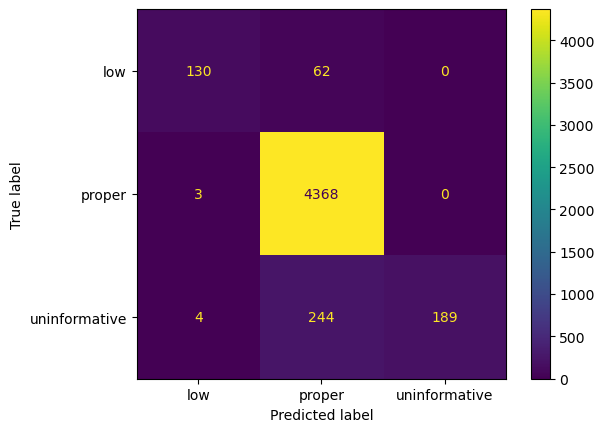

In [11]:
y_true = XY_full["y"]
y_pred = XY_predictions_regex["y"]

m = ModelEvaluator(ModelEvalWrapper(regex_m, "regex"), XY_full)
c_report = m.generate_report()
c_report.show_report()



In [42]:
import evalml
from evalml import ModelEvaluator

evaluator = ModelEvaluator(problem_type='binary')
evaluator.evaluate_predictions(y_true=df['actual'], y_pred=df['pred'])


ModuleNotFoundError: No module named 'evalml'